In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!mkdir tensorflow models
!pip install -q numpy opencv-python matplotlib

!wget --quiet https://www.dropbox.com/s/07p84k7q4kxwc02/tensorflow-1.13.2-cp37-cp37m-linux_x86_64.whl?dl=1 -O ./tensorflow/tensorflow-1.13.2-cp37-cp37m-linux_x86_64.whl
!pip install -q ./tensorflow/tensorflow-1.13.2-cp37-cp37m-linux_x86_64.whl

!curl --silent --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://github.com/google/mediapipe/blob/master/mediapipe/models/palm_detection.tflite' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/palm_detection.tflite' --output './models/palm_detection.tflite'
!curl --silent --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://github.com/google/mediapipe/blob/master/mediapipe/models/hand_landmark.tflite' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/hand_landmark.tflite' --output './models/hand_landmark.tflite'
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg

In [3]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [4]:
palm_model_path = "./models/palm_detection.tflite"
landmark_model_path = "./models/hand_landmark.tflite"
anchors_path = "./data/anchors.csv" 

In [5]:
img = cv2.imread('./data/test_img.jpg')[:,:,::-1]

In [6]:
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

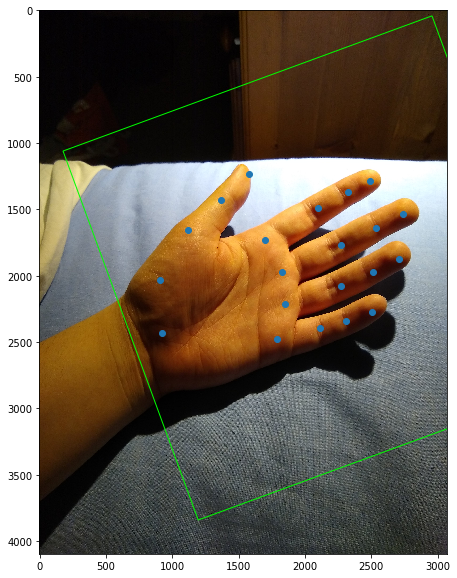

In [7]:
kp, box = detector(img)

f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
ax.add_patch(Polygon(box, color="#00ff00", fill=False))